In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
def create_results_dict(metrics = ['fid','kid']):
    # get metric
    results = {}
    for root, dirs, files in os.walk(".", topdown=False):
        i = root.find('freezed')
        if i>-1:
            freezed = int(root[i+7:i+9])
            results[freezed] = {}
            for metric in metrics: 
                results[freezed][metric] = {}
                json_paths = []
                kimg_metric_values = []
                for name in files:
                    prefix=f'metric-{metric}'
                    if prefix in name:
                        json_path = os.path.join(root, name)
                        json_paths.append(json_path)
                        kimg = int(name.split(".")[0].split("-")[-1])
                        with open(json_path) as f:
                            try:
                                result_json = json.load(f)
                                metric_value = result_json['results'][result_json['metric']]
                            except:
                                print(json_path)
                                metric_value =0
                        kimg_metric_values.append((kimg,metric_value))        
                results[freezed][metric]['json_paths'] = json_paths
                results[freezed][metric]['kimg_metric_values'] = kimg_metric_values
    return results


In [3]:
def plot_results(results, title= '', metrics = ['fid', 'kid'] ,freezed = [10,11,12,13]):
    for metric in metrics:
        plt.figure(figsize=(10,8))
        for d in freezed:
            kimg_metric_values = results[d][metric]['kimg_metric_values']
            kimg_metric_values = sorted(kimg_metric_values)
            print(kimg_metric_values[-1])
            kimgs = [item[0] for item in kimg_metric_values]
            values = [item[1] for item in kimg_metric_values]
            plt.plot(kimgs, values, label=f'freezed = {d}')
        plt.xlabel('# training iterations (real images shown to D)', fontsize=15)
        plt.ylabel(metric.upper(), fontsize=15)
        plt.legend()
        plt.title(title,fontsize=15)

/home/vb2519/stylegan2-ada-fixed
(1000, 0.007642778123123103)
(1000, 0.028738430523023027)
(1000, 0.012922080190190177)
(1000, 0.015799224617117098)


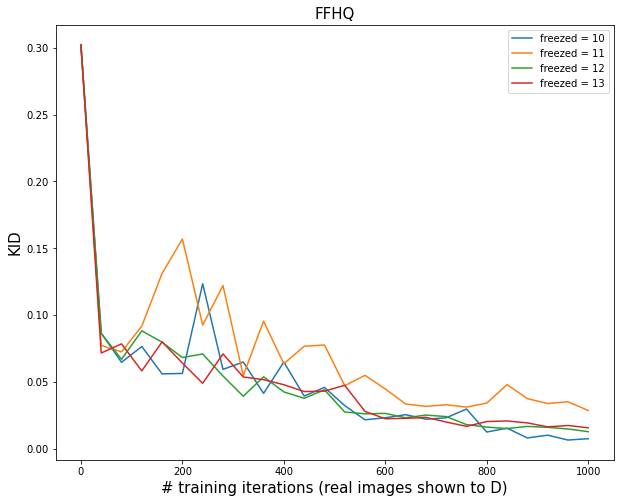

In [4]:
%cd ~/stylegan2-ada-fixed/
results = create_results_dict()
plot_results(results,title = 'FFHQ',metrics=['kid'],freezed = [10,11,12,13])

/home/vb2519/freezed-dog
(1000, 0.013248642459959947)
(1000, 0.015752306944444426)
(1000, 0.02037714258758763)
(1000, 0.01867060700200201)


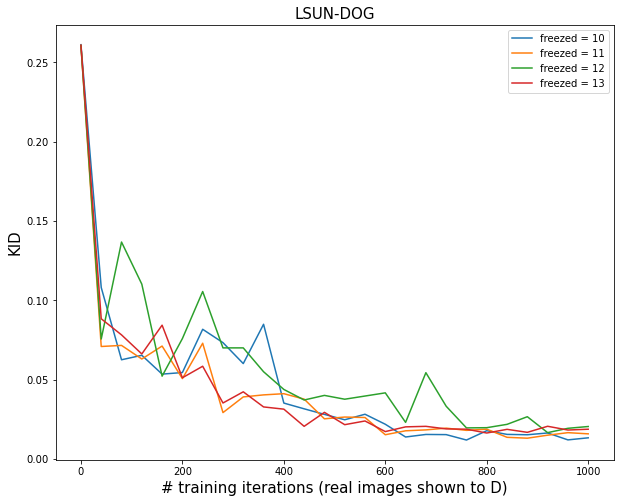

In [5]:
%cd ~/freezed-dog/
lsundog_results = create_results_dict()
plot_results(lsundog_results,title='LSUN-DOG', metrics = ['kid'], freezed = [10,11,12,13])

/home/vb2519/freeze-celeb-networks/training-runs
./00013-boredape-small-256x256-auto1-gamma2-kimg1000-batch32-resumecelebahq256-freezed11/metric-kid50k_full-000880.jsonl
./00013-boredape-small-256x256-auto1-gamma2-kimg1000-batch32-resumecelebahq256-freezed11/metric-kid50k_full-000920.jsonl
(1000, 0.014176451746746789)
(1000, 0.018186627054554535)
(1000, 0.016964101166166166)
(1000, 0.1453144858933934)


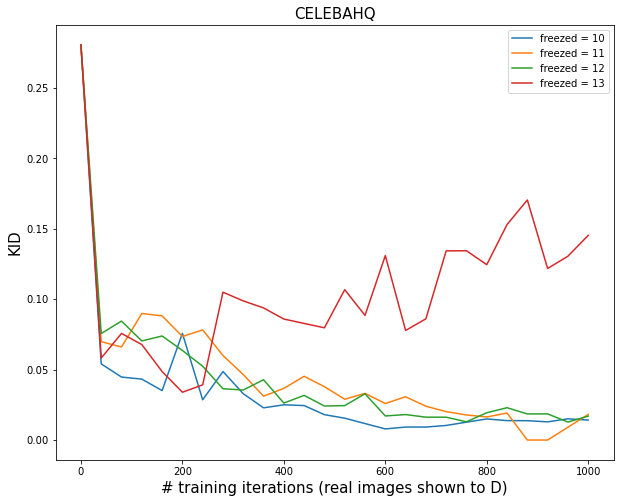

In [18]:
%cd ~/freeze-celeb-networks/training-runs
celeb_results = create_results_dict()
plot_results(celeb_results, title='CELEBAHQ', metrics = ['kid'], freezed = [10,11,12,13])

In [12]:
def compare(freezed=10):
    ffhq = sorted(results[freezed]['kid']['kimg_metric_values'])
    lsundog = sorted(lsundog_results[freezed]['kid']['kimg_metric_values'])
    celebahq = sorted(celeb_results[freezed]['kid']['kimg_metric_values'])
    ids = [3.85,5.26,3.33]
    idd = [46.44,64.91,59.08]
    dataset = ['FFHQ', 'LSUN-DOG', 'CELEBAHQ']
    plt.figure(figsize=(10,8))
    for i, kimg_metric_values in enumerate([ffhq,lsundog,celebahq]):
        kimgs = [item[0] for item in kimg_metric_values]
        values = [item[1] for item in kimg_metric_values]
        print(kimg_metric_values[-1])

        plt.plot(kimgs, values, label=f'{dataset[i]}. IDS = {ids[i]}, IDD= {idd[i]}')
    plt.title(f'KID vs KIMG with FreezeD={freezed} and \n IDS, IDD scores')
    plt.xlabel('# training iterations (images)', fontsize=15)
    plt.ylabel('KID', fontsize=15)
    plt.legend()

(1000, 0.007642778123123103)
(1000, 0.013248642459959947)
(1000, 0.014176451746746789)


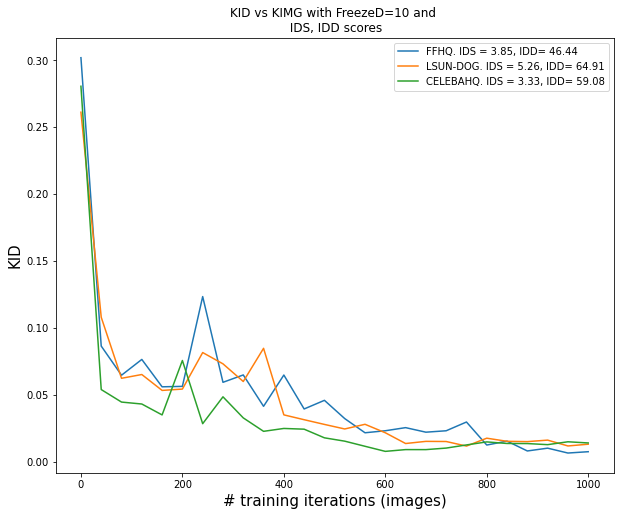

In [19]:
compare(10)

(1000, 0.028738430523023027)
(1000, 0.015752306944444426)
(1000, 0.018186627054554535)


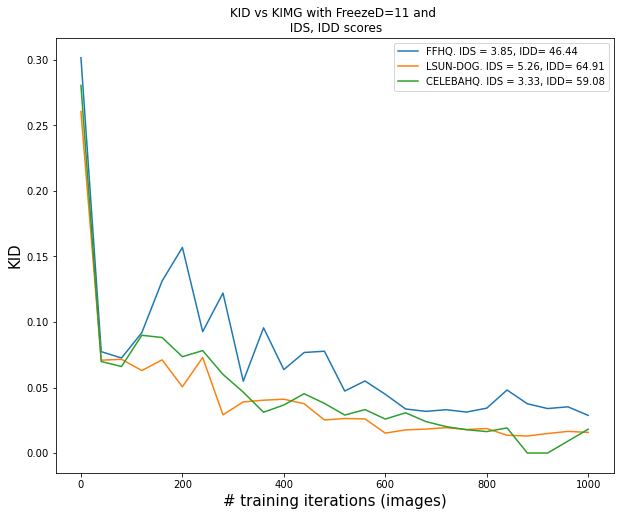

In [14]:
compare(11)

(1000, 0.012922080190190177)
(1000, 0.02037714258758763)
(1000, 0.016964101166166166)


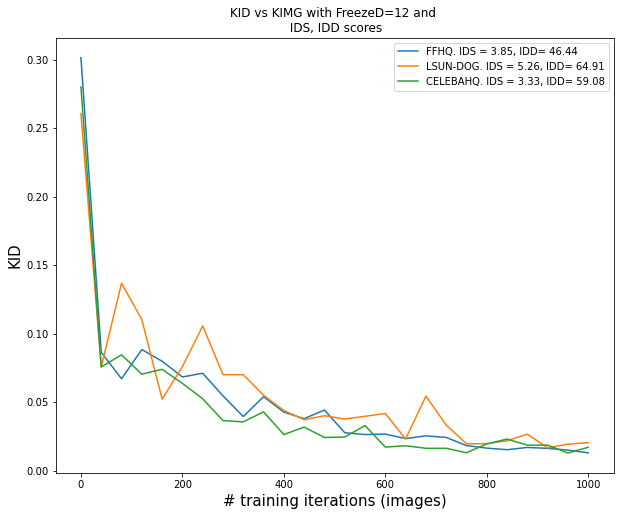

In [15]:
compare(12)

(1000, 0.015799224617117098)
(1000, 0.01867060700200201)
(1000, 0.1453144858933934)


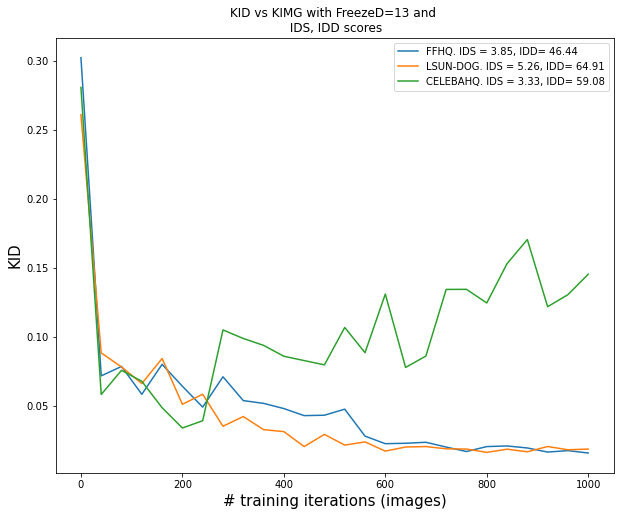

In [16]:
compare(13)

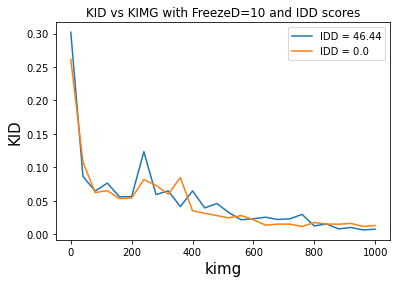

In [9]:
idd = [46.44,0]
for i, kimg_metric_values in enumerate([ffhq,lsundog]):
    kimgs = [item[0] for item in kimg_metric_values]
    values = [item[1] for item in kimg_metric_values]
    plt.plot(kimgs, values, label=f'IDD = {idd[i]}')
plt.title('KID vs KIMG with FreezeD=10 and IDD scores')
plt.xlabel('kimg', fontsize=15)
plt.ylabel('KID', fontsize=15)
plt.legend()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir ~/stylegan2-ada-fixed/training-runs/00003-boredape-small-256x256-auto1-gamma2-kimg1000-batch32-resumeffhq256-freezed10/